# 底打ちどころを探る

## 目的

時価総額の大きい銘柄の値動きのトレンドを読むことで、底打ちどころを探る

In [1]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
def get_code_into(code):
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    print(ticker.info['longName'])
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new   
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    print(ser.tail(3))

### 東証で時価総額上位 (4 月 5 日時点)

Reference: https://www.nikkei.com/marketdata/ranking-jp/market-cap-high/

In [3]:
pattern = re.compile(r'([0-9]{4}-[0-9]{2}-[0-9]{2}).*')

In [4]:
list_code = [
    '7203', '6758', '8306', '9983', '6501', '6861', '9432', '7974', '8316', '6098',
    '4519', '9433', '8001', '8058', '8766', '9434', '9984', '8035', '8411', '2914',
    '7011', '4063', '8031', '4502', '4568', '7267', '6702', '7751', '7741', '6503',
]

dt = pd.to_datetime('2025-03-27')
dt

Timestamp('2025-03-27 00:00:00')

In [5]:
summary = pd.DataFrame()
for code in list_code:
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new            
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    summary[code] = ser

summary

,7203,6758,8306,9983,6501,6861,9432,7974,8316,6098,...,7011,4063,8031,4502,4568,7267,6702,7751,7741,6503
2025-03-24,1.012197,0.974625,1.001377,0.973763,1.001070,0.988840,0.984000,0.969175,0.992380,0.994455,...,1.053786,0.980535,0.970608,0.994306,0.994916,1.031250,0.986138,0.984179,0.988415,0.975996
2025-03-25,1.019091,0.975142,0.993115,0.979355,1.006153,0.988193,0.983333,0.975975,0.980088,1.001085,...,1.032234,0.984738,0.975727,0.995401,0.994113,1.032280,0.964055,0.994658,1.003673,0.961185
2025-03-26,1.020859,0.997411,0.991049,0.993548,1.014714,0.993692,0.992000,1.027199,0.985988,0.993370,...,1.004310,0.990047,0.987450,0.992992,0.996521,1.025412,0.964055,0.996507,1.006782,0.995063
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.979104,0.983656,0.985554,0.973799,0.994573,0.989588,0.980812,0.970787,...,0.993978,0.986347,0.988415,0.999776,0.989749,0.973980,1.011334,0.989727,0.991806,0.976092
2025-03-31,0.941515,0.977414,0.933829,0.947527,0.925094,0.945819,0.981683,0.923372,0.945677,0.924312,...,0.950696,0.948075,0.940060,0.987690,0.947127,0.944093,0.955635,0.954387,0.948290,0.935673
2025-04-01,0.946734,0.977414,0.925935,0.955699,0.919743,0.936115,0.980326,0.932049,0.932968,0.940488,...,0.942416,0.947851,0.948623,1.009176,1.004316,0.945851,0.960492,0.965276,0.931619,0.925009
2025-04-02,0.955911,0.957944,0.911772,0.991398,0.927501,0.935145,0.968114,0.951685,0.917269,0.977064,...,0.965186,0.945837,0.936199,0.997762,0.966280,0.957103,0.957416,0.964660,0.930206,0.942896
2025-04-03,0.906424,0.911734,0.846529,0.974194,0.867576,0.898916,0.966757,0.920632,0.846748,0.961251,...,0.947497,0.921218,0.914876,1.016115,0.979768,0.934951,0.929080,0.916992,0.887821,0.911249
2025-04-04,0.866475,0.868380,0.774785,0.965591,0.817014,0.884522,0.977612,0.911225,0.778719,0.896910,...,0.891607,0.871531,0.890698,1.002014,0.976531,0.883966,0.909812,0.880214,0.883865,0.869797


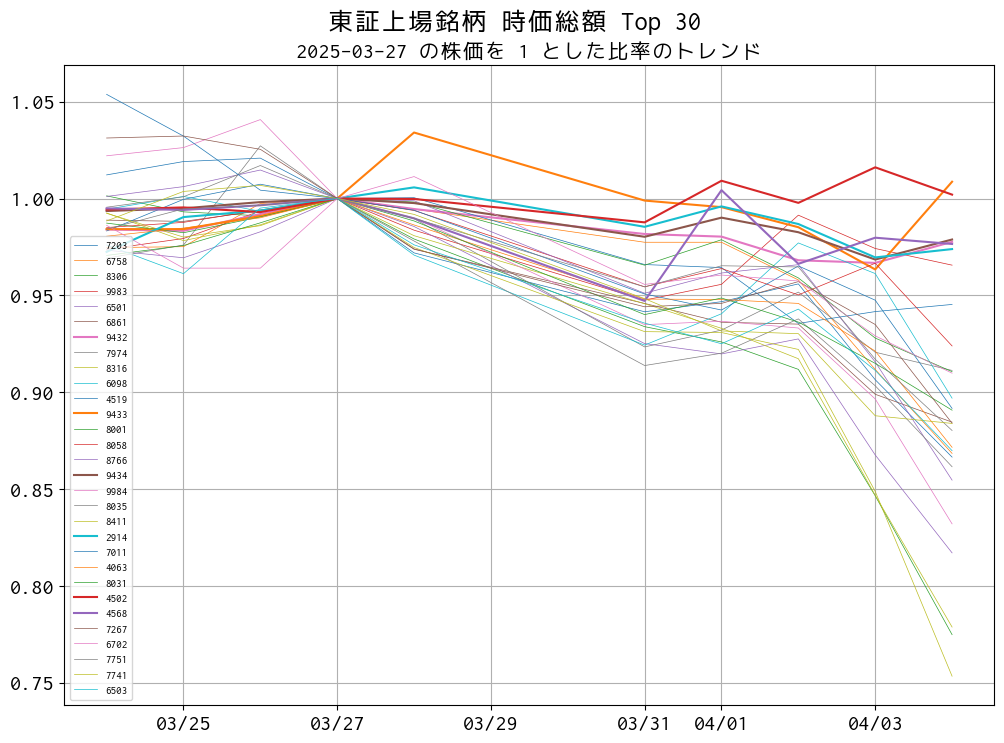

In [6]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91)

for colname in summary.columns:
    match colname:
        case '4502':
            width = 1.5
            lstyle = 'solid'
        case '9434':
            width = 1.5
            lstyle = 'solid'
        case '9432':
            width = 1.5
            lstyle = 'solid'
        case '9433':
            width = 1.5
            lstyle = 'solid'
        case '4568':
            width = 1.5
            lstyle = 'solid'
        case '2914':
            width = 1.5
            lstyle = 'solid'
        case _:
            width = 0.5
            lstyle = 'solid'
    ax.plot(summary[colname], lw=width, ls=lstyle, label=colname)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
#ax.xaxis.set_ticks(df.index)

m = pattern.match(str(dt))
date_str = m.group(1)
fig.suptitle('東証上場銘柄 時価総額 Top 30')
ax.set_title('%s の株価を 1 とした比率のトレンド' % date_str, fontsize=16)
ax.grid()
ax.legend(loc='best', fontsize=8)

plt.savefig('report_bottom_out.png' )
plt.show()

In [8]:
for code in ['9432', '9433', '9434', '2914', '4502', '4568']:
    get_code_into(code)
    print()

Nippon Telegraph and Telephone Corporation
2025-04-02    0.968114
2025-04-03    0.966757
2025-04-04    0.977612
Name: Close, dtype: float64

KDDI Corporation
2025-04-02    0.985182
2025-04-03    0.963378
2025-04-04    1.008679
Name: Close, dtype: float64

SoftBank Corp.
2025-04-02    0.982596
2025-04-03    0.968485
2025-04-04    0.978834
Name: Close, dtype: float64

Japan Tobacco Inc.
2025-04-02    0.986826
2025-04-03    0.969581
2025-04-04    0.973892
Name: Close, dtype: float64

Takeda Pharmaceutical Company Limited
2025-04-02    0.997762
2025-04-03    1.016115
2025-04-04    1.002014
Name: Close, dtype: float64

Daiichi Sankyo Company, Limited
2025-04-02    0.966280
2025-04-03    0.979768
2025-04-04    0.976531
Name: Close, dtype: float64

